# Lemon Law

Content
 1. [Problem](#section1)
   <a href="#section1"></a>
 2. [Solution](#section10)
   <a href="#section10"></a>  
 3. [Obtaining Data ](#section2)
   <a href="#section2"></a>
 4. [Data Cleaning and Preparation ](#section3)
   <a href="#section3"></a>  
   * [Speed Dating Event data Key](#section31)
     <a href="#section31"></a>
   * [Scorecard Data key ](#section32)
     <a href="#section32"></a>  
     - [Subject's Scorecard](#section321)
       <a href="#section321"></a>  
 5. [Feature Engineering/Selection](#section4)
   <a href="#section4"></a>       
 6. [Exploratory Data Analysis (EDA)](#section5)
   <a href="#section5"></a>     
   * [Relation between Choice and Decision](#section52)
     <a href="#section52"></a>
   * [Relation between Subject's Scorecard Ratings and Decision](#section53)
     <a href="#section53"></a>     
   * [Relation between Met and Decision ](#section55)
     <a href="#section55"></a>
 7. [Correlation](#section6)
   <a href="#section6"></a>   
   * [Correlation Table ](#section61)
     <a href="#section61"></a>
   * [Heatmap ](#section62)
     <a href="#section62"></a>  
 8. [Model Development](#section7)
   <a href="#section7"></a>
   * [Train,test split](#section72)
     <a href="#section72"></a> 
   * [RandomForest Algorithm ](#section73)
     <a href="#section73"></a>
 9. [Model Evaluation](#section8)
   <a href="#section8"></a>
   * [Confusion Matrix](#section81)
     <a href="#section81"></a> 
   * [Classification Report ](#section82)
     <a href="#section82"></a>
   * [ROC-curve ](#section83)
     <a href="#section83"></a>
 10. [Pickle File](#section9)
   <a href="#section9"></a>    

<a id="section1"></a>

## 1. Problem

A dating company called "Lemon Law" is planning to come up with an app which aims at improving the quality of your matches  by improving its matching system. It's searching for a holistic alternative 

<a id="section10"></a>
## 2. Solution

A predictive model is to be made by using the Speed Dating Experiment dataset to solve the problem. It's available in 
[Kaggle](https://www.kaggle.com/annavictoria/speed-dating-experiment)
   <a href=https://www.kaggle.com/annavictoria/speed-dating-experiment></a>
.

<a id="section2"></a>
## 3. Obtaining Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
speedDF=pd.read_csv("Speed Dating Data.csv", engine="python")
speedDF.shape

(8378, 195)

In [3]:
import warnings
warnings.filterwarnings('ignore')

<a id="section3"></a>
## 4. Data Cleaning and  Preparation

<a id="section31"></a>
###  &nbsp; 4.1. Speed Dating Event data Key

1. iid: 	unique subject number, group(wave id gender)

2. id:  	subject number within wave

3. gender:	Female=0,Male=1

4. idg: 	subject number within gender, group(id gender)

5. condtn: 1=limited choice , 2=extensive choice

6. wave: The day on which the speed dating event takes place.

7. round:		number of people that met in wave

8. order: 		the number of date that night when met partner

9. partner: 	partner’s id number the night of event

10. pid: 		partner’s iid number

11. match		1=yes, 0=no

12. int_corr:	correlation between participant’s and partner’s ratings of interests in Time 1

13. samerace:  	participant and the partner were the same race. 1= yes, 0=no

14. age_o:		age of partner

15. race_o:		race of partner




In [4]:
all=["object","int64","float"]

In [5]:
col1=["iid","id","gender","idg","condtn","wave","round","order","partner","pid","match","int_corr","samerace"]

In [6]:
speedDF[col1].shape

(8378, 13)

In [7]:
speedDF[col1][speedDF["iid"]==11].head(11)

,iid,id,gender,idg,condtn,wave,round,order,partner,pid,match,int_corr,samerace
100,11,1.0,1,2,1,1,10,4,1,1.0,0,0.14,0
101,11,1.0,1,2,1,1,10,10,2,2.0,0,0.29,1
102,11,1.0,1,2,1,1,10,6,3,3.0,0,-0.24,1
103,11,1.0,1,2,1,1,10,3,4,4.0,0,-0.18,1
104,11,1.0,1,2,1,1,10,1,5,5.0,0,-0.43,1
105,11,1.0,1,2,1,1,10,5,6,6.0,0,0.33,0
106,11,1.0,1,2,1,1,10,2,7,7.0,0,0.19,0
107,11,1.0,1,2,1,1,10,7,8,8.0,0,-0.03,1
108,11,1.0,1,2,1,1,10,8,9,9.0,0,0.19,0
109,11,1.0,1,2,1,1,10,9,10,10.0,0,0.30,1


In [8]:
speedDF[col1].describe(include=all)

,iid,id,gender,idg,condtn,wave,round,order,partner,pid,match,int_corr,samerace
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,8.927668,8.963595,283.863767,0.164717,0.196010,0.395799
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.477009,5.491068,158.584899,0.370947,0.303539,0.489051
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,0.000000,-0.830000,0.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,154.000000,0.000000,-0.020000,0.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,8.000000,281.000000,0.000000,0.210000,0.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,13.000000,408.000000,0.000000,0.430000,1.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,552.000000,1.000000,0.910000,1.000000


### Correlation between subject and partner's interests  column (int_corr)

In [9]:
speedDF["int_corr"][speedDF["int_corr"].isnull()]="NaN"
median=speedDF["int_corr"].median()
speedDF["int_corr"][speedDF["int_corr"]=="NaN"]=median

### Partner's age column (age_o)

In [10]:
speedDF["age_o"][speedDF["age_o"].isnull()]="NaN"
speedDF["age_o"][speedDF["age_o"]=="NaN"]=median
median=speedDF["age_o"].median()
median

26.0

In [11]:
speedDF["age_o"][speedDF["age_o"]=="NaN"]=median

### Partner's race column (race_o)

In [12]:
speedDF["race_o"][speedDF["race_o"].isnull()]="NaN"

In [13]:
speedDF["samerace"][(speedDF["race_o"]=="NaN")].value_counts()

0    73
Name: samerace, dtype: int64

None of these instances involve subject and partner of the same race.

### checking if 'race' column is up to date

In [14]:
speedDF["race"].describe()

count    8315.000000
mean        2.757186
std         1.230905
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         6.000000
Name: race, dtype: float64

It's incomplete and has equal number of empty instances when compared to 'race_o' column. 

In [15]:
speedDF["race_o"].value_counts()

2.0    4722
4.0    1978
3.0     664
6.0     521
1.0     420
NaN      73
Name: race_o, dtype: int64

as majority of them have the value two, the missing instances too will be assigned the same value. 

In [16]:
speedDF["race_o"][(speedDF["race_o"]=="NaN")]=2.0

In [17]:
speedDF[col1].describe(include=all)

,iid,id,gender,idg,condtn,wave,round,order,partner,pid,match,int_corr,samerace
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8368.000000,8378.000000,8378.00,8378.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.00,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.00,NaN
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,8.927668,8.963595,283.863767,0.164717,NaN,0.395799
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.477009,5.491068,158.584899,0.370947,NaN,0.489051
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,154.000000,0.000000,NaN,0.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,8.000000,281.000000,0.000000,NaN,0.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,13.000000,408.000000,0.000000,NaN,1.000000


In [18]:
speedDF["int_corr"]=speedDF["int_corr"].astype(float)
speedDF["age_o"]=speedDF["age_o"].astype(int)
speedDF["race_o"]=speedDF["race_o"].astype(int)

In [19]:
speedDF[col1].dtypes

iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
wave          int64
round         int64
order         int64
partner       int64
pid         float64
match         int64
int_corr    float64
samerace      int64
dtype: object

In [20]:
for column in col1:
    empty_cells=speedDF[column].isnull().sum()
    print("Total empty cells in "+column+": ",empty_cells)

Total empty cells in iid:  0
Total empty cells in id:  1
Total empty cells in gender:  0
Total empty cells in idg:  0
Total empty cells in condtn:  0
Total empty cells in wave:  0
Total empty cells in round:  0
Total empty cells in order:  0
Total empty cells in partner:  0
Total empty cells in pid:  10
Total empty cells in match:  0
Total empty cells in int_corr:  0
Total empty cells in samerace:  0


In [21]:
speedDF.dropna(subset=["id","pid"],inplace=True)
speedDF.reset_index(drop=True,inplace=True)   

In [22]:
for column in col1:
    neg_cells=speedDF[column][speedDF[column]<0]
    total_neg_cells=len(neg_cells)   
    print("Total negative cells in "+column+": ",total_neg_cells)

Total negative cells in iid:  0
Total negative cells in id:  0
Total negative cells in gender:  0
Total negative cells in idg:  0
Total negative cells in condtn:  0
Total negative cells in wave:  0
Total negative cells in round:  0
Total negative cells in order:  0
Total negative cells in partner:  0
Total negative cells in pid:  0
Total negative cells in match:  0
Total negative cells in int_corr:  2146
Total negative cells in samerace:  0


In [23]:
col1.remove("int_corr")

In [24]:
speedDF.shape

(8367, 195)

<a id="section32"></a>
### 4.2. Scorecard Data key

1. Decision:dec 1=yes,0=no
	
2. Attributes
   (1=awful, 10=great)	
   * Attractive: attr
   * Sincere: sinc
   * Intelligent: intel
   * Fun: fun
   * Ambitious: amb
   * Shared Interests/Hobbies: shar
	
3. Overall, how much do you like this person?
   (1=don't like at all, 10=like a lot)-->like
 
4. How probable do you think it is that this person will say 'yes' for you?
   (1=not probable, 10=extremely probable)-->prob
 
5. Have you met this person before?
   (1=yes,2=no)-->met


<a id="section321"></a>
### &nbsp; 4.2.1 Subject's Scorecard

In [25]:
col2=["dec","attr","sinc","intel","fun","amb","shar","like","prob","met"]

In [26]:
speedDF[col2].describe(include=all)

,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
count,8367.000000,8165.000000,8090.000000,8071.000000,8017.000000,7655.000000,7301.000000,8127.000000,8059.000000,7992.000000
mean,0.420103,6.190741,7.175278,7.369471,6.400773,6.778250,5.475483,6.134761,5.208276,0.947698
std,0.493605,1.949978,1.740682,1.550522,1.953754,1.794143,2.155675,1.841219,2.129485,0.989884
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,5.000000,4.000000,0.000000
50%,0.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,6.000000,5.000000,0.000000
75%,1.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,2.000000
max,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.000000


In [27]:
speedDF["met"].value_counts()

0.0    4046
2.0    3588
1.0     350
7.0       3
5.0       2
6.0       1
8.0       1
3.0       1
Name: met, dtype: int64

In [28]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"met"]>2:
        speedDF.loc[i,"met"]=2
    else:
        continue;

In [29]:
speedDF["met"].value_counts()

0.0    4046
2.0    3596
1.0     350
Name: met, dtype: int64

In [30]:
speedDF["attr"][speedDF["attr"].isnull()]="NaN"
speedDF["sinc"][speedDF["sinc"].isnull()]="NaN"
speedDF["intel"][speedDF["intel"].isnull()]="NaN"
speedDF["fun"][speedDF["fun"].isnull()]="NaN"
speedDF["amb"][speedDF["amb"].isnull()]="NaN"
speedDF["shar"][speedDF["shar"].isnull()]="NaN"
speedDF["like"][speedDF["like"].isnull()]="NaN"
speedDF["prob"][speedDF["prob"].isnull()]="NaN"
speedDF["met"][speedDF["met"].isnull()]="NaN"

In [31]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"attr"]=="NaN":
        a1=speedDF["attr"][speedDF["pid"]==speedDF.loc[i,"pid"]].median()
        speedDF.loc[i,"attr"]=a1
    else:
        continue;

In [32]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"sinc"]=="NaN":
        a1=speedDF["sinc"][speedDF["pid"]==speedDF.loc[i,"pid"]].median()
        speedDF.loc[i,"sinc"]=a1
    else:
        continue;

In [33]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"intel"]=="NaN":
        a1=speedDF["intel"][speedDF["pid"]==speedDF.loc[i,"pid"]].median()
        speedDF.loc[i,"intel"]=a1
    else:
        continue;

In [34]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"fun"]=="NaN":
        a1=speedDF["fun"][speedDF["pid"]==speedDF.loc[i,"pid"]].median()
        speedDF.loc[i,"fun"]=a1
    else:
        continue;

In [35]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"amb"]=="NaN":
        a1=speedDF["amb"][speedDF["pid"]==speedDF.loc[i,"pid"]].median()
        speedDF.loc[i,"amb"]=a1
    else:
        continue;

In [36]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"shar"]=="NaN":
        a1=speedDF["shar"][speedDF["pid"]==speedDF.loc[i,"pid"]].median()
        speedDF.loc[i,"shar"]=a1
    else:
        continue;

In [37]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"like"]=="NaN":
        a1=speedDF["like"][speedDF["pid"]==speedDF.loc[i,"pid"]].median()
        speedDF.loc[i,"like"]=a1
    else:
        continue;

In [38]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"prob"]=="NaN":
        a1=speedDF["prob"][speedDF["pid"]==speedDF.loc[i,"pid"]].median()
        speedDF.loc[i,"prob"]=a1
    else:
        continue;

In [39]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"met"]=="NaN":
        a1=speedDF["met"][speedDF["pid"]==speedDF.loc[i,"pid"]].median()
        speedDF.loc[i,"met"]=a1
    else:
        continue;

In [40]:
speedDF[col2].dtypes

dec       int64
attr     object
sinc     object
intel    object
fun      object
amb      object
shar     object
like     object
prob     object
met       int64
dtype: object

In [41]:
speedDF["attr"]=speedDF["attr"].astype(float)
speedDF["sinc"]=speedDF["sinc"].astype(float)
speedDF["intel"]=speedDF["intel"].astype(float)
speedDF["fun"]=speedDF["fun"].astype(float)
speedDF["amb"]=speedDF["amb"].astype(float)
speedDF["shar"]=speedDF["shar"].astype(float)
speedDF["like"]=speedDF["like"].astype(float)
speedDF["prob"]=speedDF["prob"].astype(float)

In [42]:
speedDF[col2].describe(include=all)

,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
count,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000
mean,0.420103,6.193546,7.175391,7.367127,6.400502,6.783196,5.486883,6.135287,5.211725,0.936178
std,0.493605,1.938220,1.715843,1.529292,1.926324,1.734937,2.051781,1.821873,2.097982,0.976775
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,5.000000,4.000000,0.000000
50%,0.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,6.000000,5.000000,0.000000
75%,1.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,2.000000
max,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000


In [43]:
for column in col2:
    empty_cells=speedDF[column].isnull().sum()
    print("Total empty cells in "+column+": ",empty_cells)

Total empty cells in dec:  0
Total empty cells in attr:  0
Total empty cells in sinc:  0
Total empty cells in intel:  0
Total empty cells in fun:  0
Total empty cells in amb:  0
Total empty cells in shar:  0
Total empty cells in like:  0
Total empty cells in prob:  0
Total empty cells in met:  0


In [44]:
for column in col2:
    neg_cells=speedDF[column][speedDF[column]<0].values.sum()
    print("Total negative cells in "+column+": ",neg_cells)

Total negative cells in dec:  0
Total negative cells in attr:  0.0
Total negative cells in sinc:  0.0
Total negative cells in intel:  0.0
Total negative cells in fun:  0.0
Total negative cells in amb:  0.0
Total negative cells in shar:  0.0
Total negative cells in like:  0.0
Total negative cells in prob:  0.0
Total negative cells in met:  0


In [45]:
speedDF.shape

(8367, 195)

<a id="section4"></a>
## 5. Feature Engineering and Selection

<a id="section41"></a>
### &nbsp; 5.1.  Subject's Overall Rating of Partner

In [46]:
speedDF["rating"]=(speedDF["attr"]+speedDF["sinc"]+speedDF["intel"]+speedDF["fun"]+speedDF["amb"]+speedDF["shar"])/6.0

The culmination of all attributes rated out of ten by the subject.

In [47]:
speedDF["rating"].dtypes

dtype('float64')

<a id="section43"></a>
### &nbsp; 5.2.  Actually Met before

In [48]:
speedDF["act_met"]=speedDF["met"]
for i in range(0,len(speedDF)):
    if (speedDF.loc[i,"met"]==speedDF.loc[i,"met_o"]) & (speedDF.loc[i,"met"]==1):
        speedDF.loc[i,"act_met"]=1
    elif  (speedDF.loc[i,"met"]==speedDF.loc[i,"met_o"]) & (speedDF.loc[i,"met"]==2):
        speedDF.loc[i,"act_met"]=0
    elif  (speedDF.loc[i,"met"]!=speedDF.loc[i,"met_o"]):
        speedDF.loc[i,"act_met"]=0

In [49]:
speedDF["act_met"].dtypes

dtype('int64')

## Feature Selection

<a id="section5"></a>
## 6. Exploratory Data Analysis (EDA)

Checking relation of feature variables with target variable,which is column "dec"

In [50]:
data=speedDF

<a id="section52"></a>
### &nbsp; 6.1. Relation between Choice and Decision

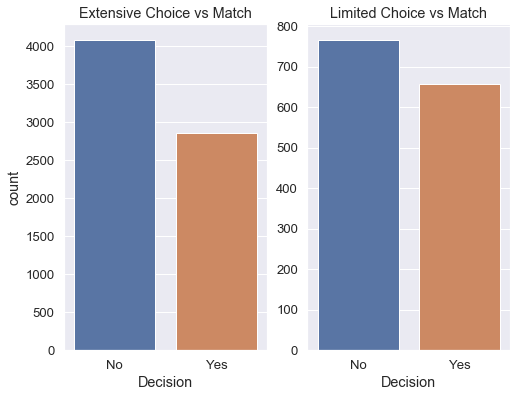

In [51]:
sns.set(font_scale=1.2)
fig,axs=plt.subplots(1,2,figsize=(8,6))
c1=sns.countplot(x="dec",data=data[data["condtn"]==2],ax=axs[0])
c1.set_xticklabels(["No","Yes"])

c1.set(xlabel="Decision")
c1.set_title("Extensive Choice vs Match")
c2=sns.countplot(x="dec",data=data[data["condtn"]==1],ax=axs[1])
c2.set_xticklabels(["No","Yes"])

c2.set(ylabel="")
c2.set(xlabel="Decision")
c2.set_title("Limited Choice vs Match")
plt.show(c1)
plt.show(c2)

There is no relation between Choice and Match.

<a id="section53"></a>
### 6.2. Relation between Subject's scorecard ratings and decision

Text(0.5, 1.0, 'Shared Interests vs Decision')

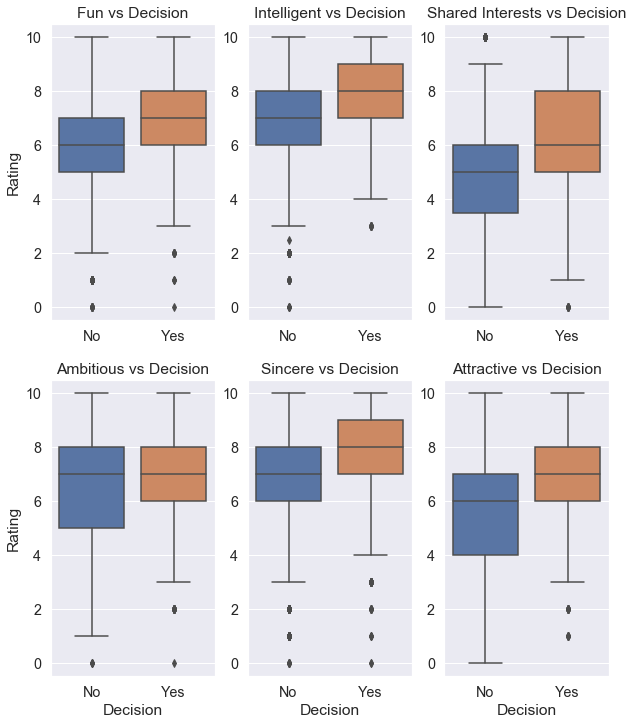

In [52]:
sns.set(font_scale=1.3)
fig,axs=plt.subplots(2,3,figsize=(10,12))
c1=sns.boxplot(y="fun",x="dec",data=data,ax=axs[0,0])
c1.set_xticklabels(["No","Yes"])
c1.set(ylabel="Rating")
c1.set(xlabel="")
c1.set_title("Fun vs Decision")

c2=sns.boxplot(y="intel",x="dec",data=data,ax=axs[0,1])
c2.set_xticklabels(["No","Yes"])
c2.set(ylabel="")
c2.set(xlabel="")
c2.set_title("Intelligent vs Decision")

c3=sns.boxplot(y="amb",x="dec",data=data,ax=axs[1,0])
c3.set_xticklabels(["No","Yes"])
c3.set(ylabel="Rating")
c3.set(xlabel="Decision")
c3.set_title("Ambitious vs Decision")

c4=sns.boxplot(y="sinc",x="dec",data=data,ax=axs[1,1])
c4.set_xticklabels(["No","Yes"])
c4.set(ylabel="")
c4.set(xlabel="Decision")
c4.set_title("Sincere vs Decision")


c5=sns.boxplot(y="attr",x="dec",data=data,ax=axs[1,2])
c5.set_xticklabels(["No","Yes"])
c5.set(ylabel="")
c5.set(xlabel="Decision")
c5.set_title("Attractive vs Decision")

c6=sns.boxplot(y="shar",x="dec",data=data,ax=axs[0,2])
c6.set_xticklabels(["No","Yes"])
c6.set(ylabel="")
c6.set(xlabel="")
c6.set_title("Shared Interests vs Decision")

While attributes like Attractive, Shared Interests,Intelligent,Sincere and Fun from the scorecard shows a significant correlation with decision, ambitious attribute doesn't show any correlation with it.

<a id="section55"></a>
### &nbsp; 6.3. Relation between Met and Decision

Text(0.5, 1.0, "Haven't Met vs Match")

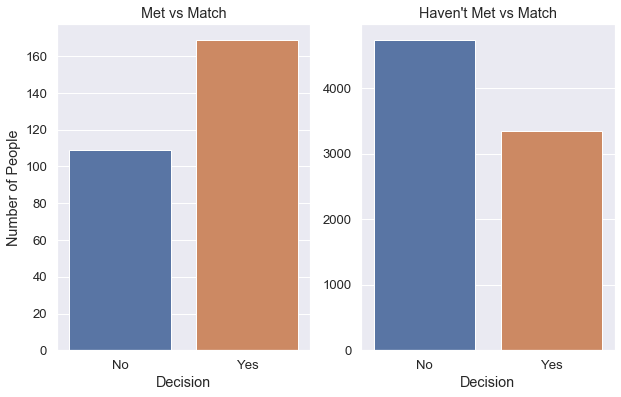

In [53]:
sns.set(font_scale=1.2)
fig,axs=plt.subplots(1,2,figsize=(10,6))
c1=sns.countplot(x="dec",data=data[data["act_met"]==1],ax=axs[0])
c1.set_xticklabels(["No","Yes"])
c1.set(ylabel="Number of People")
c1.set(xlabel="Decision")
c1.set_title("Met vs Match")



c2=sns.countplot(x="dec",data=data[data["act_met"]==0],ax=axs[1])
c2.set_xticklabels(["No","Yes"])
c2.set(xlabel="Decision")
c2.set(ylabel=" ")
c2.set_title("Haven't Met vs Match")




Second date is on the cards when subject has met their partner before.

<a id="section6"></a>
##  7. Feature Selection

In [54]:
columns=[]
columns=col1+col2+["rating","act_met"]
remove_list=["iid","id","pid","dec","match","prob","like"]
for e in remove_list:
    columns.remove(e)
X=speedDF.loc[:,columns]
y=speedDF.loc[:,"dec"]

In [55]:
#Univariate Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [56]:
features_score_model=SelectKBest(score_func=chi2,k=len(columns))
features_score_array=features_score_model.fit(X,y)
features_score=features_score_array.scores_


In [57]:
features_score_table=pd.DataFrame(data={"feature":columns,"score":features_score})

In [58]:
features_score_table

,feature,score
0,gender,51.330566
1,idg,10.722082
2,condtn,0.926154
3,wave,3.660603
4,round,13.279992
5,order,28.762036
6,partner,0.092854
7,samerace,2.612433
8,attr,1161.076905
9,sinc,147.242701


In [59]:
features_score_table.nlargest(15,"score")

,feature,score
8,attr,1161.076905
13,shar,939.402018
11,fun,802.519617
15,rating,430.184806
9,sinc,147.242701
10,intel,121.643601
12,amb,117.401447
0,gender,51.330566
16,act_met,40.251283
5,order,28.762036


In [60]:
## Feature Importance
"""
This techniques rates every feature by giving it a particular score.
Higher the score,more relevant is the feature.

"""
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [61]:
model.feature_importances_

array([0.0215962 , 0.07510389, 0.01122529, 0.05368137, 0.04827417,
       0.06446457, 0.06229115, 0.02590684, 0.14463647, 0.05585204,
       0.05124165, 0.10027559, 0.05513107, 0.08936779, 0.02301244,
       0.11217966, 0.0057598 ])

In [62]:
feature_imp_table=pd.Series(model.feature_importances_,index=columns)
feature_imp_table

gender      0.021596
idg         0.075104
condtn      0.011225
wave        0.053681
round       0.048274
order       0.064465
partner     0.062291
samerace    0.025907
attr        0.144636
sinc        0.055852
intel       0.051242
fun         0.100276
amb         0.055131
shar        0.089368
met         0.023012
rating      0.112180
act_met     0.005760
dtype: float64

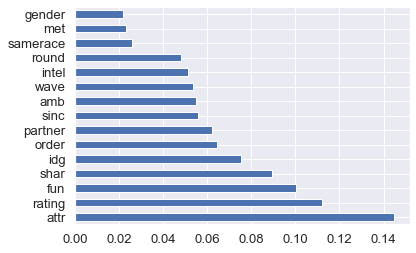

In [63]:
feature_imp_table.nlargest(15).plot(kind='barh')

<a id="section61"></a>
### &nbsp; 7.1. Correlation Table

In [64]:
## Correlation 
columns.append("dec")
corr_matrix=speedDF[columns].corr()
features=corr_matrix.index
corr_matrix


,gender,idg,condtn,wave,round,order,partner,samerace,attr,sinc,intel,fun,amb,shar,met,rating,act_met,dec
gender,1.000000,0.034145,-0.000054,-0.000192,0.022422,0.007308,0.010314,0.000097,0.136876,0.043445,-0.051457,0.057295,-0.105696,0.023315,0.000237,0.028971,0.000022,0.110762
idg,0.034145,1.000000,0.324241,0.091529,0.387082,0.154174,0.150154,-0.011601,-0.039588,-0.052864,-0.064306,-0.059780,-0.061745,-0.038585,-0.073554,-0.069638,-0.038729,-0.013623
condtn,-0.000054,0.324241,1.000000,0.217567,0.815757,0.323496,0.318160,0.067853,-0.000556,-0.042678,-0.019281,-0.027191,-0.019199,-0.024365,-0.145511,-0.029400,-0.061551,-0.037870
wave,-0.000192,0.091529,0.217567,1.000000,0.235576,0.092069,0.090871,-0.015856,-0.021773,-0.046859,-0.048794,-0.004513,-0.037739,-0.047625,-0.533435,-0.045315,-0.068453,-0.011759
round,0.022422,0.387082,0.815757,0.235576,1.000000,0.399422,0.390907,0.032721,-0.033174,-0.073629,-0.061308,-0.058058,-0.055105,-0.048270,-0.173880,-0.072541,-0.058127,-0.037591
order,0.007308,0.154174,0.323496,0.092069,0.399422,1.000000,0.157531,0.008149,-0.013867,-0.110866,-0.080939,-0.036575,-0.057465,0.011947,-0.072330,-0.059730,-0.039666,-0.031987
partner,0.010314,0.150154,0.318160,0.090871,0.390907,0.157531,1.000000,-0.013921,0.029564,-0.016308,-0.028171,0.012680,-0.005715,-0.006005,-0.071209,-0.001421,-0.038017,0.001816
samerace,0.000097,-0.011601,0.067853,-0.015856,0.032721,0.008149,-0.013921,1.000000,0.049119,0.010418,0.015796,0.012804,0.015482,0.061245,0.072458,0.038601,0.016119,0.022742
attr,0.136876,-0.039588,-0.000556,-0.021773,-0.033174,-0.013867,0.029564,0.049119,1.000000,0.395195,0.384890,0.580594,0.345031,0.463967,-0.004896,0.721135,0.105698,0.478342
sinc,0.043445,-0.052864,-0.042678,-0.046859,-0.073629,-0.110866,-0.016308,0.010418,0.395195,1.000000,0.651335,0.482273,0.440016,0.374812,0.042696,0.729170,0.059366,0.207111


### &nbsp; 7.2. Finding High Correlation Features

In [65]:
def correlation(dataset, threshold):
    high_corr = [] # List of all the names of deleted columns
    corr_matrix =dataset.corr()
    lt_corr_matrix=corr_matrix.where(np.tril(np.ones(corr_matrix.shape)).astype(np.bool))
    cols_list=list(corr_matrix.columns)
    rows,columns=corr_matrix.shape

    # Adding blacklisted columns to the empty list "del_cols"                              
    for column in range(0,columns):
        for row in range(column+1,rows):
            if (corr_matrix.iloc[row, column] >= threshold ) and (cols_list[column] not in high_corr ):
                col_name = cols_list[column] # getting the name of column
                high_corr.append(col_name)
            else:
                continue
    for column in range(1,columns):
        for row in range(0,column):
            if (corr_matrix.iloc[row, column] >= threshold) and (cols_list[column] not in high_corr ):
                col_name = cols_list[column] # getting the name of column
                high_corr.append(col_name)
            else:
                continue
    high_corr1=high_corr[:int(len(high_corr)/2)]
    high_corr2=high_corr[int(len(high_corr)/2):]
    high_corr_feats=[]
    for i in range(0,int(len(high_corr)/2)):
        high_corr_feats.append(high_corr1[i]+' - '+high_corr2[i])
    return high_corr_feats

In [66]:
correlation(speedDF[columns],0.8)

['condtn - round', 'fun - rating']

In [67]:
remove_list=["round","rating"]
for i in remove_list:
    columns.remove(i)

<a id="section62"></a>
### &nbsp; 7.3. Plotting a Heatmap to visualize Correlation table


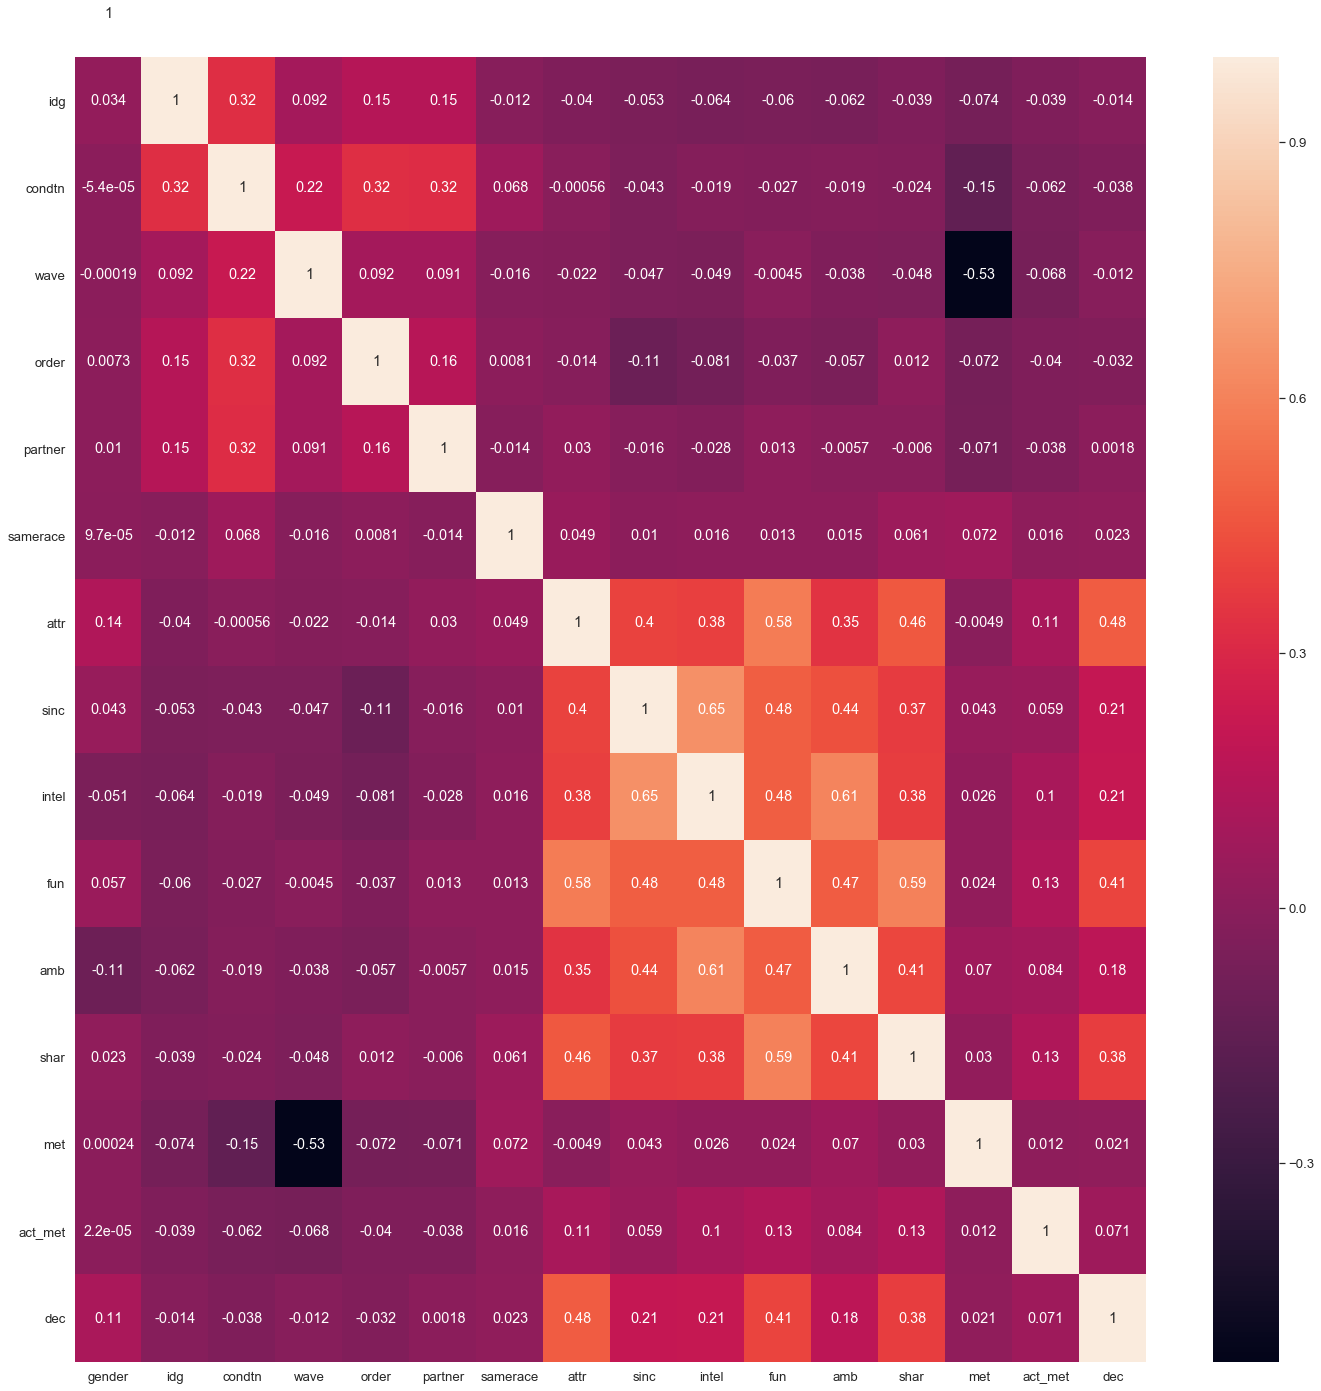

In [68]:
plt.figure(figsize=(24,24))
hm=sns.heatmap(speedDF[columns].corr(),annot=True)
plt.yticks(rotation=0)
bottom,top=hm.get_ylim()
hm.set_ylim(bottom+0.5,top+0.5)
hm

The following features are to be selected for the model.
* attr 	
* shar 
* fun 	 
* sinc 	
* intel
* amb 
* gender

In [69]:
features=["attr","shar","fun","sinc","intel","amb","gender"]


In [70]:
X=speedDF[features]
y=speedDF["dec"]

<a id="section7"></a>

## 8. Model Development using Pipelines


In [71]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

<a id="section72"></a>

###  &nbsp; 8.1. Train, test split

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.35)

<a id="section73"></a>
### &nbsp; 8.2. RandomForest Algorithm

In [73]:
from sklearn.ensemble import RandomForestClassifier
d=RandomForestClassifier()
d.fit(X_train, y_train)
a=d.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, a)

0.7289177193581428

In [74]:
#### RandomizedSearchCV

import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100,10)]
# Minimum number of samples required to split a node
min_samples_split = [2,4,5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [ 1,2, 4, 6, 8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'min_samples_split': [2, 4, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [75]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=4,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 14.7min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [76]:
best_estm=rf_randomcv.best_estimator_

In [77]:
RF_predictions= best_estm.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, RF_predictions)

0.7446227381358825

In [78]:
### GridSearchCV


param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [40], 'max_features': ['sqrt'], 'min_samples_leaf': [4, 6, 8], 'min_samples_split': [8, 9, 10, 11, 12], 'n_estimators': [0, 100, 200, 300, 400]}


In [79]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  5.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [80]:
best_estm=grid_search.best_estimator_

In [81]:
best_estm

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=40, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
RF_predictions= best_estm.predict(X_test)
accuracy_score(y_test, RF_predictions)

0.7442813246841925

<a id="section8"></a>
## 9. Model Evaluation

In [83]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

<a id="section81"></a>
###  &nbsp; 9.1. Confusion Matrix


In [84]:
import numpy as np
cm = pd.DataFrame(confusion_matrix(y_test, RF_predictions))
cm['Total'] = np.sum(cm, axis=1)
cm = cm.append(np.sum(cm, axis=0), ignore_index=True)
cm.columns = ['Predicted No', 'Predicted Yes', 'Total']
cm = cm.set_index([['Actual No', 'Actual Yes', 'Total']])
print(cm)

            Predicted No  Predicted Yes  Total
Actual No           1380            335   1715
Actual Yes           414            800   1214
Total               1794           1135   2929


<a id="section82"></a>
###  &nbsp; 9.2. Classification Report


In [85]:
print(classification_report(y_test, RF_predictions))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79      1715
           1       0.70      0.66      0.68      1214

    accuracy                           0.74      2929
   macro avg       0.74      0.73      0.73      2929
weighted avg       0.74      0.74      0.74      2929



<a id="section83"></a>
###  &nbsp; 9.3. ROC-curve


In [86]:
logit_roc_auc = roc_auc_score(y_test, RF_predictions) 

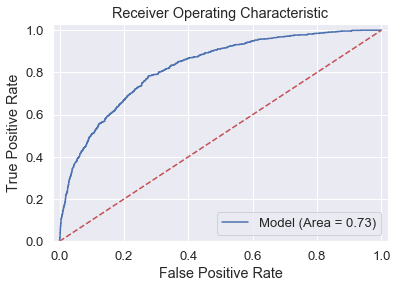

In [87]:
fpr, tpr, thresholds = roc_curve(y_test, best_estm.predict_proba(X_test)[:,1]) 
plt.figure()
plt.plot(fpr, tpr, label='Model (Area = %0.2f)' % logit_roc_auc) 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.02])
plt.ylim([0.0, 1.03])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

<a id="section9"></a>
## 10. Pickle File

In [88]:
### Create a pickle file using Serialisation
import pickle
pickle_out=open("classifier.pkl","wb")
pickle.dump(best_estm,pickle_out)
pickle_out.close()